In [13]:
import tensorflow
from tensorflow import keras
import numpy as np

In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt

In [16]:
batch_size = 128
num_class = 10
epochs = 20

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [18]:
keras.backend.image_data_format()

'channels_last'

In [19]:
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

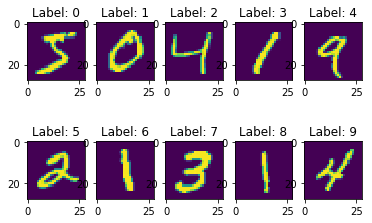

In [20]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label: " + str(i))
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)


In [21]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28 ,1)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class, activation='softmax'),
    
    
])


In [23]:
# 最適化関数 RMSpropAdam SGD
# categorical_crossentropy: One-Hot-Encoding [1, 0, 0]とか
# sparse_categorical_crossentropy: 1, 2, 4とか、ターゲットが分類できる時


model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
  160/60000 [..............................] - ETA: 27:40 - loss: 2.2803 - acc: 0.2125

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test, y_test)


In [ ]:
y_test[0:10]

In [ ]:
# それぞれの画像に対し、0~9 のどれに一番近いか推定
predicted = model.predict(x_test[0:10])

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("pre: " + str(np.argmax(predicted[i])))
    plt.imshow(x_test[i].reshape(28, 28), cmap=None)